# PCA on the MNIST dataset

In this notebook, we'll be working with the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), a collection of 28x28 handwritten digits.

In [3]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

We can retrieve this dataset using the `fetch_openml` function from sklearn.

In [4]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

To save on memory, let's just use the first 1000 elements.

In [5]:
X = X[:1000]
y = y[:1000]

Change the value of i below to view different elements of the dataset.

Label: 5


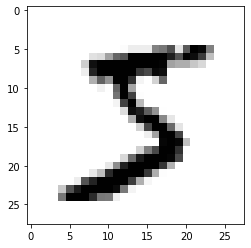

In [7]:
i = 0

print(f'Label: {y[i]}')
plt.imshow(X[i].reshape(28,28), cmap = plt.cm.gray_r);

In [168]:
pca_pipe = Pipeline(steps = [
    ('scale', StandardScaler()),
    ('pca', PCA())
])

pca_pipe.fit(X)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA())])

In [9]:
projection = pca_pipe.transform(X)

Let's see how well the projection distinguishes different digits.

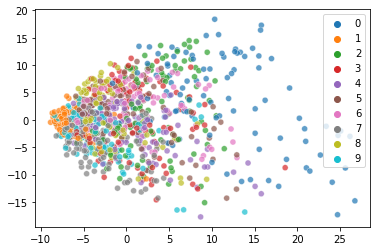

In [10]:
sns.scatterplot(projection[:,0], projection[:,1], 
                hue = pd.Series(y[:]).astype('category'),
               alpha = 0.7);

Now, let's compare a model classification model fit on the whole dataset to one fit on a projection.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [14]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('logreg', LogisticRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('logreg', LogisticRegression())])

In [15]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        24
           1       0.93      0.90      0.91        29
           2       0.81      0.88      0.85        25
           3       0.81      0.91      0.86        23
           4       0.88      0.88      0.88        26
           5       0.76      0.83      0.79        23
           6       0.90      0.79      0.84        24
           7       0.87      0.90      0.88        29
           8       0.88      0.68      0.77        22
           9       0.77      0.68      0.72        25

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250



In [16]:
print(confusion_matrix(y_test, pipe.predict(X_test)))

[[23  0  0  0  0  0  1  0  0  0]
 [ 0 26  1  0  0  1  0  0  1  0]
 [ 0  0 22  1  1  1  0  0  0  0]
 [ 1  0  1 21  0  0  0  0  0  0]
 [ 0  0  0  1 23  0  0  0  0  2]
 [ 0  0  1  1  0 19  0  0  0  2]
 [ 2  0  2  0  0  0 19  0  1  0]
 [ 0  1  0  1  0  0  0 26  0  1]
 [ 0  1  0  1  1  3  1  0 15  0]
 [ 2  0  0  0  1  1  0  4  0 17]]


We'll use the pca_pipe we fit above. We can inspect the explained_variance_ratio_ to decide upon a cutoff.

In [17]:
pca_pipe['pca'].explained_variance_ratio_.cumsum()

array([0.06494624, 0.11977076, 0.16543467, 0.20029736, 0.23223053,
       0.25914928, 0.28318804, 0.30543182, 0.32510009, 0.3438685 ,
       0.36028807, 0.37628935, 0.39075642, 0.40498046, 0.4188201 ,
       0.43197782, 0.44470365, 0.45696432, 0.46841867, 0.47957493,
       0.49015274, 0.50048934, 0.51038982, 0.52001065, 0.52938262,
       0.53817773, 0.54667732, 0.55485921, 0.56274981, 0.57054814,
       0.57804847, 0.58532649, 0.59252631, 0.59957296, 0.606331  ,
       0.61300197, 0.61946627, 0.62576928, 0.63200437, 0.63793587,
       0.64366571, 0.64925859, 0.6546573 , 0.66001152, 0.66532355,
       0.67057804, 0.67569096, 0.68072068, 0.68569607, 0.69049326,
       0.6951745 , 0.69983494, 0.70437484, 0.70891044, 0.71330467,
       0.71758653, 0.72170248, 0.72578624, 0.72976523, 0.73369937,
       0.73757921, 0.74136397, 0.74503198, 0.74869458, 0.75232417,
       0.75583059, 0.75929736, 0.76271265, 0.76608958, 0.76940143,
       0.7726818 , 0.77590711, 0.77909043, 0.78218085, 0.78523

In [34]:
28*28

784

Let's try a cutoff of 100 dimensions. You'll see that we still get good model performance even when removing 684 dimensions (or even more) from our dataset.

In [35]:
cutoff = 100
pca_pipe['pca'].explained_variance_ratio_.cumsum()[cutoff]

0.8501199573261531

In [36]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components = cutoff)),
    ('logreg', LogisticRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=100)),
                ('logreg', LogisticRegression())])

In [37]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.93      0.93      0.93        29
           2       0.79      0.92      0.85        25
           3       0.79      0.96      0.86        23
           4       1.00      0.88      0.94        26
           5       0.66      0.83      0.73        23
           6       0.90      0.75      0.82        24
           7       0.87      0.90      0.88        29
           8       0.87      0.59      0.70        22
           9       0.76      0.64      0.70        25

    accuracy                           0.83       250
   macro avg       0.84      0.83      0.83       250
weighted avg       0.84      0.83      0.83       250



In [38]:
print(confusion_matrix(y_test, pipe.predict(X_test)))

[[21  0  0  0  0  2  1  0  0  0]
 [ 0 27  1  0  0  1  0  0  0  0]
 [ 0  0 23  1  0  1  0  0  0  0]
 [ 1  0  0 22  0  0  0  0  0  0]
 [ 0  0  0  1 23  0  0  0  0  2]
 [ 0  0  2  1  0 19  0  0  1  0]
 [ 2  0  1  0  0  2 18  0  1  0]
 [ 0  0  0  1  0  0  0 26  0  2]
 [ 0  2  0  1  0  4  1  0 13  1]
 [ 2  0  2  1  0  0  0  4  0 16]]


Now, let's see what the identified principal components look like.

In [39]:
from ipywidgets import interact, IntSlider

Keep in mind that this is in the centered and scaled space.

In [110]:
@interact(i = IntSlider(value = 0, min = 0, max = 28*28 - 1))
def show_component(i):
    plt.imshow((pca_pipe['pca'].components_[i]).reshape(28,28),
          cmap = plt.cm.gray_r, vmin = -0.1, vmax = 0.1)

interactive(children=(IntSlider(value=0, description='i', max=783), Output()), _dom_classes=('widget-interact'…

We can also use the principal components to get a lower-dimensional representation of our original data. In this case, we can visualize what this lower-dimensional representation looks like.

This is taking advantage of the fact that for each observation, 
$$\text{observation}_i = \lambda_1 \vec{v}_1 + \cdots + \lambda_n\vec{v}_n$$ where $\vec{v}_j$ is the $j$  principal component and $\lambda_j = \text{observation}_i \cdot \vec{v}_j$ (the dot product). To get a lower-dimensional representation, we can simply truncate the sum. We'll pull this off with matrix algebra magic in the below function.

In [175]:
i = 1

@interact(dimensions = IntSlider(value = 1, min = 1, max = 28*28))
def show_component(dimensions):
    proj = np.matmul(np.matmul(pca_pipe['scale'].transform(X[i].reshape(1, -1)),
              np.transpose(pca_pipe['pca'].components_[:dimensions,:])),
              pca_pipe['pca'].components_[:dimensions,:])

    proj = pca_pipe['scale'].inverse_transform(proj.reshape(1, -1))

    fig, ax = plt.subplots(ncols = 2)
    ax[0].imshow(X[i].reshape(28, 28), cmap = plt.cm.gray_r, vmin = 0, vmax = 255)
    ax[0].set_title('Original Image')
    ax[1].imshow(proj.reshape(28,28), cmap = plt.cm.gray_r, vmin = 0, vmax = 255)
    ax[1].set_title(f'{dimensions} Components');

interactive(children=(IntSlider(value=1, description='dimensions', max=784, min=1), Output()), _dom_classes=('…